In [22]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn_pandas import DataFrameMapper, cross_val_score
import sklearn.preprocessing, sklearn.decomposition, sklearn.linear_model, sklearn.pipeline, sklearn.metrics
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

In [23]:
df = pd.read_csv('india_surroundings_1mar2016 _28_feb_2017.csv')

In [24]:
df.head()

,Year,Month,Day,Time UTC,Mag,Lat,Lon,Depth km,Region,IRIS ID,Timestamp
0,2017,2,27,04:21:42,4.6,27.35,85.96,25.7,NEPAL,10004460,1488169302
1,2017,2,27,03:37:46,4.7,27.50,86.17,10.0,NEPAL,10004453,1488166666
2,2017,2,26,18:48:45,4.8,30.28,83.56,10.0,XIZANG,10004374,1488134925
3,2017,2,26,05:57:03,4.1,36.45,71.23,103.9,AFGHANISTAN-TAJIKISTAN BORD REG.,10004276,1488088623
4,2017,2,24,12:50:59,4.3,36.25,70.00,134.9,"HINDU KUSH REGION, AFGHANISTAN",10003539,1487940659


In [25]:
del df['IRIS ID'], df['Year'], df['Month'], df['Day'], df['Time UTC']

In [26]:
df.describe()

,Mag,Lat,Lon,Depth km,Timestamp
count,280.000000,280.000000,280.000000,280.000000,2.800000e+02
mean,4.494643,31.771107,79.282536,90.975357,1.471467e+09
std,0.416428,6.894564,10.009182,71.509370,9.126734e+06
min,3.600000,8.350000,68.920000,4.100000,1.456901e+09
25%,4.200000,27.950000,70.830000,25.800000,1.463153e+09
50%,4.400000,35.870000,71.925000,90.150000,1.470943e+09
75%,4.600000,36.520000,89.397500,135.375000,1.479141e+09
max,6.900000,37.760000,96.750000,298.300000,1.488169e+09


/home/nikhil/programs/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


,Mag,Depth km,Lat,Lon,Timestamp
Mag,1.000000,-0.156322,-0.272058,0.334685,0.071506
Depth km,-0.156322,1.000000,0.471849,-0.569523,-0.026960
Lat,-0.272058,0.471849,1.000000,-0.785022,0.055928
Lon,0.334685,-0.569523,-0.785022,1.000000,-0.047623
Timestamp,0.071506,-0.026960,0.055928,-0.047623,1.000000


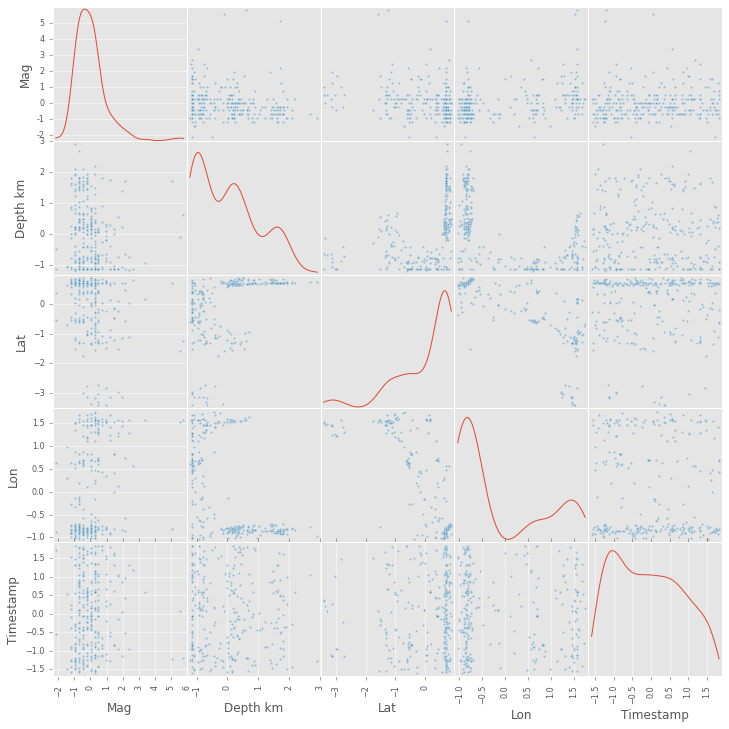

In [28]:
axs = pd.scatter_matrix(df, figsize=(12,12), diagonal='kde')
df.corr()

In [29]:
df = pd.get_dummies(df, columns = ['Region'])

In [30]:
df.head()

,Mag,Depth km,Lat,Lon,Timestamp,Region_AFGHANISTAN,Region_AFGHANISTAN-TAJIKISTAN BORD REG.,"Region_ANDAMAN ISLANDS, INDIA","Region_ANDAMAN ISLANDS, INDIA REGION",Region_EASTERN KASHMIR,...,Region_NORTHERN INDIA,Region_NORTHWESTERN KASHMIR,Region_PAKISTAN,"Region_QINGHAI, CHINA",Region_SOUTHEASTERN AFGHANISTAN,Region_SOUTHERN INDIA,"Region_SOUTHERN XINJIANG, CHINA",Region_TAJIKISTAN,Region_WESTERN XIZANG-INDIA BORDER REG.,Region_XIZANG
0,0.253455,-0.914457,-0.642393,0.668328,1.833269,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.494023,-1.134402,-0.620598,0.689347,1.832979,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.734591,-1.134402,-0.216660,0.428119,1.829495,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.949383,0.181064,0.679850,-0.805955,1.824413,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.468248,0.615350,0.650790,-0.929063,1.808172,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
pipe = sklearn.pipeline.make_pipeline(mapper, sklearn.svm.SVC())

DataFrameMapper(default=False, df_out=True,
        features=[('Region', None), (['Mag'], StandardScaler(copy=True, with_mean=True, with_std=True)), (['Depth km'], StandardScaler(copy=True, with_mean=True, with_std=True)), (['Lat'], StandardScaler(copy=True, with_mean=True, with_std=True)), (['Lon'], StandardScaler(copy=True, with_mean=True, with_std=True)), (['Timestamp'], StandardScaler(copy=True, with_mean=True, with_std=True))],
        sparse=False)

In [44]:
X = df.copy()
del X['Mag']
y = df.Mag

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [46]:
svm = sklearn.svm.SVR()
svm.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [47]:
from sklearn.metrics import mean_squared_error
mean_squared_error(svm.predict(X_test), y_test)

0.77309121841762962

In [49]:
for a,b in zip(svm.predict(X_test), y_test):
    print(a,b)

0.35713999774 0.253455226966
0.421383805942 0.975158246123
-0.220951789864 -0.468247792191
-0.602658426847 -0.468247792191
-0.37181167843 -0.227680119139
-0.00432127218464 -0.468247792191
-0.448162316469 -0.227680119139
0.234566181918 0.0128875539135
0.3191564021 -0.468247792191
0.499050369988 -0.227680119139
-0.364357151629 0.0128875539135
-0.103539525311 -0.949383138296
-0.33122740395 -0.227680119139
-0.180678323529 -1.18995081135
0.3824377921 -0.708815465243
-0.332854845865 -0.949383138296
0.0337891078309 -0.708815465243
-0.360605282312 -0.227680119139
0.0130220495023 0.494022900018
0.320326315499 -0.468247792191
0.18308362055 -0.227680119139
-0.249224303341 -0.708815465243
-0.483131864386 0.253455226966
-0.407345934731 -0.949383138296
0.319711028622 -0.468247792191
0.355204111974 0.494022900018
-0.287938490515 1.93742893833
0.405537192917 -0.708815465243
0.389914273883 -0.468247792191
-0.407140095709 -0.708815465243
-0.279830797664 0.253455226966
0.0149115628132 -0.708815465243
0.1